In [2]:
import yfinance as yf

def get_stock_price(stock, if_max=False, start='2022-01-01', end='2023-01-01'):
    if if_max:
        return yf.download(stock, period='max', actions=True)
    else:
        return yf.download(stock, start=start, end=end, actions=True)

In [3]:
def get_return(stock_dict, adj=False):
  label = 'Adj Close' if adj else 'Close'
  for stock in stock_dict.keys():
    stock_dict[stock]['Return'] = stock_dict[stock][label].pct_change().fillna(0)
  return stock_dict

In [4]:
stock_dict = {}
stock_list = ['GOOG', 'AMZN', 'JPM', 'GME', 'XOM', 'SPY']
for stock in stock_list:
  stock_dict[stock] = get_stock_price(stock, start='2005-01-01', end='2023-12-12')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [5]:
# get return
stock_dict = get_return(stock_dict, adj=True)

In [6]:
import pandas as pd
rt = pd.concat([stock_dict[i]['Return'] for i in stock_list], axis=1, keys=[i + '_Return' for i in stock_list])
rt

,GOOG_Return,AMZN_Return,JPM_Return,GME_Return,XOM_Return,SPY_Return
Date,,,,,,
2005-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2005-01-04,-0.040501,-0.053459,-0.010307,-0.010683,-0.006788,-0.012220
2005-01-05,-0.005090,-0.008780,0.002083,-0.000939,-0.005226,-0.006900
2005-01-06,-0.025632,-0.017237,0.005715,-0.006109,0.012730,0.005084
2005-01-07,0.028109,0.030938,-0.008008,-0.075650,-0.006584,-0.001433
...,...,...,...,...,...,...
2023-12-05,0.013473,0.014085,-0.000127,-0.121908,-0.019428,-0.000197
2023-12-06,-0.007251,-0.016068,-0.010508,-0.004695,-0.013242,-0.004030
2023-12-07,0.053412,0.016330,0.003071,0.102426,-0.006962,0.007630


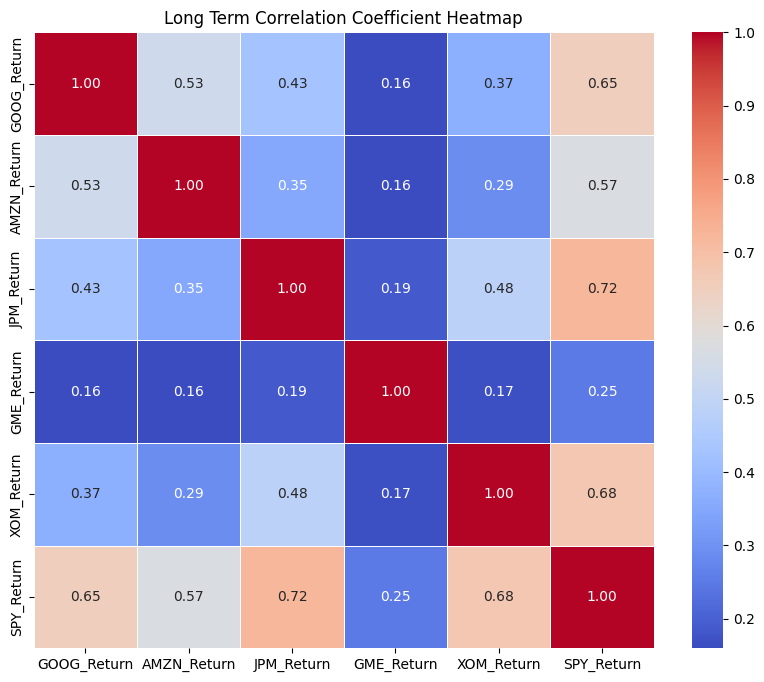

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(rt.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Long Term Correlation Coefficient Heatmap')
plt.show()

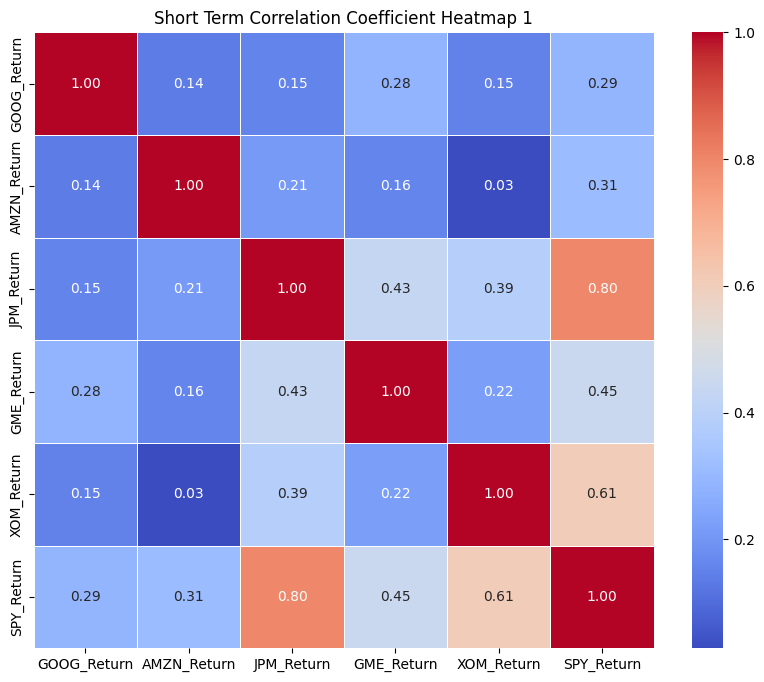

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(rt.iloc[:40, :].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Short Term Correlation Coefficient Heatmap 1')
plt.show()

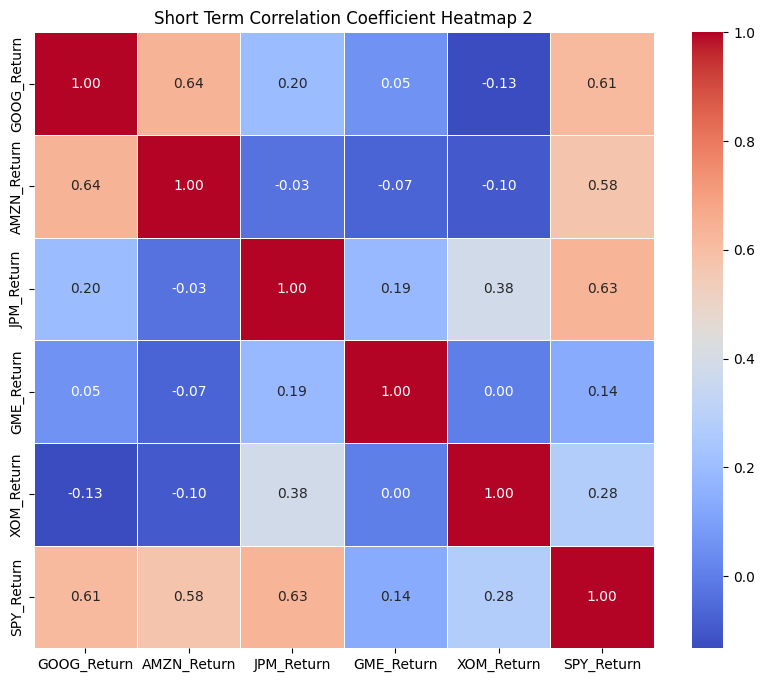

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(rt.iloc[-40:, :].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Short Term Correlation Coefficient Heatmap 2')
plt.show()